<a href="https://colab.research.google.com/github/master8848/Colab/blob/main/madhavABC_method_nepse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Small Appliction for Checking on Stocks

url for initial data used "https://www.merolagani.com/LatestMarket.aspx"

Packages Installation

In [ ]:
%pip install pandas
%pip  install requests
%pip  install bs4 #beautifulsoup4
%pip  install numpy
%pip  install io
%pip install lxml
%pip install openpyxl
%pip install matplotlib
%pip install gspread

ERROR: Could not find a version that satisfies the requirement io (from versions: none)
ERROR: No matching distribution found for io


Getting Data into application

In [ ]:
import requests
from bs4 import BeautifulSoup

import pandas as pd

from io import StringIO


# URL of the webpage containing the table
url = "https://www.merolagani.com/LatestMarket.aspx"

# Fetch the HTML content
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table in the HTML
table = soup.find('table')

#
# Making Data Usable Form HTML/WEBSITE
#
# Wrap the HTML string in a StringIO object
html_string = str(table)
html_buffer = StringIO(html_string)
# Read the table into a pandas DataFrame
NepseAplhaDF = pd.read_html(html_buffer)[0]

NepseAplhaDF.drop(columns=['PClose', 'Diff.',"Unnamed: 9","Unnamed: 10"], inplace=True)


See single Stock Info

In [ ]:
Stock_Name="BBC"
NepseAplhaDF[NepseAplhaDF["Symbol"]==Stock_Name]

,Symbol,LTP,% Change,Open,High,Low,Qty.
12,BBC,6525.0,1.64,6548.0,6300.0,6425.0,3535


All of dynamic variables

In [ ]:

# Path to your Sheet link file
file_path =  "https://docs.google.com/spreadsheets/d/1wT_FukA-K-3iJKIBlHGrCXWMA12WFhpXjR0wI__7pwY/edit?usp=sharing"

near_amount=10

description_name="DESC"
correction_near_name="NEAR"

if(file_path.endswith("/edit?usp=sharing")):
  file_path=file_path.replace("/edit?usp=sharing","/export?format=csv")

GET Watchlist data
and calculate if condition is met or not

In [ ]:

import pandas as pd

# Read the sheet link file
# WatchListDF = pd.read_excel(file_path)
WatchListDF = pd.read_csv(file_path )


WatchListDF['SYMBOL'] = WatchListDF['SYMBOL'].str.upper()
merged_df = pd.merge(NepseAplhaDF, WatchListDF, left_on='Symbol', right_on='SYMBOL')
merged_df[correction_near_name]=merged_df[correction_near_name].fillna(near_amount)
merged_df[description_name]=merged_df[description_name].fillna("")



# Apply condition
def check_condition(row):
    if row['MORE_THAN_OR_LESS_THAN'] == 'more':
        return row['LTP'] > row['PRICE']
    elif row['MORE_THAN_OR_LESS_THAN'] == 'less':
        return row['LTP'] < row['PRICE']
    else:
        return None

def add_percentage(row)->int:
   persentageInt:int= ((row["PRICE"]-row["LTP"])/row["LTP"])
   return round( persentageInt*100,2)

def check_near_amount(row)->bool|None:
    if row['MORE_THAN_OR_LESS_THAN'] == 'more':
        # return row['LTP'] > row['PRICE']
        return row['LTP']+row[correction_near_name] > row['PRICE']
    elif row['MORE_THAN_OR_LESS_THAN'] == 'less':
        # return row['LTP'] < row['PRICE']
        return row['LTP']-row[correction_near_name] < row['PRICE']
    else:
        return None


merged_df['Condition_Met'] = merged_df.apply(check_condition, axis=1)
merged_df['Near_Condition'] = merged_df.apply(check_near_amount, axis=1)

merged_df=merged_df[merged_df['Condition_Met'].notnull()]

# merged_df["Percentage"]= merged_df.apply(add_percentage, axis=1)


merged_df.sort_values(by=['Condition_Met','Near_Condition'], ascending=False, inplace=True)

new_order = [
    'Symbol',
    'Condition_Met',
    'Near_Condition',
    'MORE_THAN_OR_LESS_THAN',
    'LTP',
    'PRICE',
    correction_near_name,
    # 'Percentage',
    'Qty.',
    description_name
    ]

merged_df=merged_df[new_order]
merged_df.rename(columns={'NEAR': 'Support_Number'}, inplace=True)
# merged_df['Condition_Met']=merged_df["Condition_Met"]


merged_df

,Symbol,Condition_Met,Near_Condition,MORE_THAN_OR_LESS_THAN,LTP,PRICE,Support_Number,Qty.,DESC
0,AHL,False,True,more,737.0,800,400,9055,


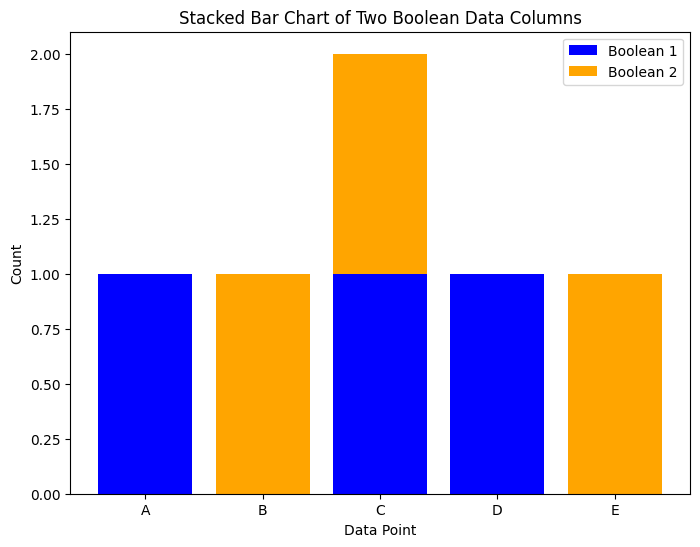